# Sentiment Analysis

In [1]:
import numpy as np
from collections import Counter

In [2]:
g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

In [5]:
print("Count of Reviews ", len(reviews), " and Labels ",len(labels))

Count of Reviews  25000  and Labels  25000


### View the reviews and corresponding labels

In [6]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:100] + "...")

In [7]:
pretty_print_review_and_label(213)
pretty_print_review_and_label(18)
pretty_print_review_and_label(667)
pretty_print_review_and_label(234)
pretty_print_review_and_label(527)
pretty_print_review_and_label(998)

NEGATIVE	:	this film has to be the worst i have ever seen . the title of the film deceives the audience into th...
POSITIVE	:	you know  robin williams  god bless him  is constantly shooting himself in the foot lately with all ...
NEGATIVE	:	my girlfriend once brought around the zombie chronicles for us to watch as a joke . little did we re...
POSITIVE	:	directed by govind nihalani  this is definite cop film of indian cinema . may be the first one which...
NEGATIVE	:	the documentary revolves around eva mozes kor  a holocaust survivor  part of mengele  s experiments ...
POSITIVE	:	many of the criticisms on this thread seem to pick a comparison of this film with  the mortal storm ...


### Finding the positive to negative ratios 

In [8]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common(60)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488)]

In [10]:
negative_counts.most_common(60)

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730)]

In [11]:
pos_neg_ratios = Counter()

for word, count in list(total_counts.most_common()):
    if count>100:
        pos_neg_ratio = positive_counts[word] / float(negative_counts[word]+1)
        pos_neg_ratios[word] = pos_neg_ratio

In [12]:
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

In [13]:
pos_neg_ratios["are"] #Neutral case

0.012436027214787634

In [14]:
pos_neg_ratios["best"] #positive case

0.7234703406044631

In [15]:
pos_neg_ratios["bad"] #negative case

-1.3562189073456823

### Creating a Dictionary

In [16]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [17]:
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
#word2index

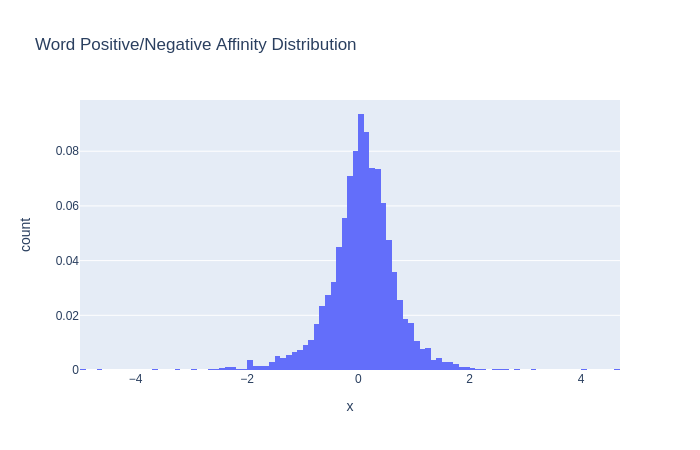

In [18]:
import plotly.express as px
fig = px.histogram(x= list(map(lambda x:x[1], pos_neg_ratios.most_common())) ,nbins = 100 , histnorm = 'probability' , 
             title = "Word Positive/Negative Affinity Distribution")
fig.show('png')

In [19]:
freq = Counter()

for word, count in total_counts.most_common():
    freq[count] += 1

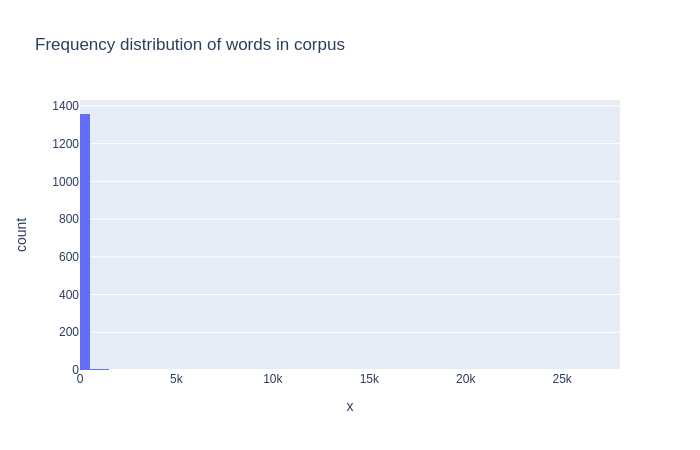

In [20]:
fig = px.histogram(x= list(map(lambda x:x[1], freq.most_common())) ,nbins = 100 ,
                   title = "Frequency distribution of words in corpus")
fig.show("png")

## Modelling

In [21]:
from model import SentimentNetwork

In [22]:
mlp = SentimentNetwork(reviews[:-2000],labels[:-2000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)

In [23]:
mlp.train(reviews[:-2000],labels[:-2000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.8% Speed(reviews/sec):1418. #Correct:1971 #Trained:2501 Training Accuracy:78.8%
Progress:21.7% Speed(reviews/sec):1402. #Correct:4039 #Trained:5001 Training Accuracy:80.7%
Progress:32.6% Speed(reviews/sec):1346. #Correct:6163 #Trained:7501 Training Accuracy:82.1%
Progress:43.4% Speed(reviews/sec):1253. #Correct:8317 #Trained:10001 Training Accuracy:83.1%
Progress:54.3% Speed(reviews/sec):1216. #Correct:10471 #Trained:12501 Training Accuracy:83.7%
Progress:65.2% Speed(reviews/sec):1230. #Correct:12601 #Trained:15001 Training Accuracy:84.0%
Progress:76.0% Speed(reviews/sec):1193. #Correct:14747 #Trained:17501 Training Accuracy:84.2%
Progress:86.9% Speed(reviews/sec):1159. #Correct:16935 #Trained:20001 Training Accuracy:84.6%
Progress:97.8% Speed(reviews/sec):1147. #Correct:19130 #Trained:22501 Training Accuracy:85.0%
Progress:99.9% Speed(reviews/sec):1144. #Correct:19559 #Trained:23000 Training

In [24]:
mlp.test(reviews[-2000:],labels[-2000:])

Progress:99.9% Speed(reviews/sec):2085. #Correct:1756 #Tested:2000 Testing Accuracy:87.8%